## 04a - Arab Spring Inclusion as Outlink
This goes throuhg and determines what times the Arabic Spring page includes the countries and events

import:

    00_en_as_rev_outlinks_m.pkl
    00_en_as_rev_time_m.pkl

    00_ar_as_rev_outlinks_m.pkl
    00_ar_as_rev_time_m.pkl
    03b_ILLdf_ar.pkl
    
output:

    Visuals/03c_ILLlineChart.png
    Visuals/03c_ILLlineChart_ar.png
    
    
    
The Plan:
- this goes through and does some initial work with the outlinks 
- it grabs all of the outlinks in the english and arabic versions of the arab spring
- organize them by ones that are only in each language. 
- identify ones that are in both by if there were english outlinks
- that had an arabic ILL and if that arabic ILL was also an outlink


1. English
2. Arabic

In [1]:
import numpy as np
import pandas as pd

import json, requests

import networkx as nx
import os
import pickle

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [ ]:
## 1. English

### 1a. Get English Data

In [2]:
#gets the outlink specific time:revid
with open('../Data/00_en_as_rev_time_m.pkl', 'rb') as pickleFile:
    time_revids = pickle.load(pickleFile)

#gets the outlink specific revid:outlinks 
with open('../Data/00_en_as_rev_outlinks_m.pkl', 'rb') as pickleFile:
     revid_outlinks = pickle.load(pickleFile)

In [6]:
# time_revids

In [ ]:
# revid_outlinks

### 1b. English Countries

In [8]:
countrylyst = ['Tunisia', 'Egypt', 'Libya', 'Yemen', 'Syria', 'Bahrain', 'Algeria',  'Iraq', 'Jordan', 'Morocco', 'Oman']

In [38]:
#get all of the timestamps in which the arab spring includes the evnets in countrylyst

countryTimes = {}
firstTimes = {}

for place in countrylyst:
    # print(place)
            
    #get all of the revids that contain 'Arab Spring' in their outlinks
    revidlyst = []
    for revid, outlinks in revid_outlinks.items():
        for link in outlinks:
            if link == place:
                revidlyst.append(revid)
                
    # make the list unique
    revidlyst_unique = set(revidlyst)
    
    inclusionTimes = []
    for i in revidlyst_unique:
        rev_time = time_revids[time_revids == i].index[0]
        inclusionTimes.append(rev_time)
        
    inclusionTimes.sort()   

    
    firstTimes[place] = inclusionTimes[0]
    countryTimes[place] = inclusionTimes

In [ ]:
#check
# countryTimes['Tunisia'][0:5]

[Timestamp('2011-01-31 00:00:00+0000', tz='UTC', freq='M'),
 Timestamp('2011-02-28 00:00:00+0000', tz='UTC', freq='M'),
 Timestamp('2011-05-31 00:00:00+0000', tz='UTC', freq='M'),
 Timestamp('2011-06-30 00:00:00+0000', tz='UTC', freq='M'),
 Timestamp('2011-07-31 00:00:00+0000', tz='UTC', freq='M')]

In [39]:
# Break up the start and end times

countryDF_final = pd.DataFrame(columns = ['event', 'start', 'end'])

for place in countryTimes.keys():
    startTimes = []
    endTimes = []

    start = firstTimes[place]
    startTimes.append(start)
    
    first = countryTimes[place][0]
    final = countryTimes[place][-1:]

    currTime = start
    #get start and end dates
    #go through all the dates in Tunisia
    for date in countryTimes[place]:

        month_from_start = pd.Timestamp(start) + pd.offsets.MonthEnd(n=1)

        #if it reaches the end add it to the endTimes
        if date in final:
            endTimes.append(date)

        if date == first:
            pass

        #if a month is skipped, end the last one with the start(or previous date)
        #start a new section with the new one
        elif date == month_from_start:
    #         print('----pass')
            pass

        #if it is one month after the 'start' - then pass
        else: 
            endTimes.append(start)
            startTimes.append(date)

    #     #if it is not then go back and put end
        start = date
        
    #make dataframe
    countryDict = pd.DataFrame(columns = ['event', 'start', 'end'])
    
    
    countryDict['start'] = startTimes
    countryDict['end'] = endTimes
    countryDict['event'] = place
#     print(countryDict)
    
    countryDF_final = pd.concat([countryDF_final,countryDict])
    

In [ ]:
# countryDF_final.head()

,event,start,end
0,Tunisia,2011-01-31 00:00:00+00:00,2011-02-28 00:00:00+00:00
1,Tunisia,2011-05-31 00:00:00+00:00,2013-06-30 00:00:00+00:00
2,Tunisia,2013-08-31 00:00:00+00:00,2018-02-28 00:00:00+00:00
3,Tunisia,2018-04-30 00:00:00+00:00,2024-06-30 00:00:00+00:00
0,Egypt,2011-01-31 00:00:00+00:00,2011-03-31 00:00:00+00:00


### 1b. Plot English Country Inclusion

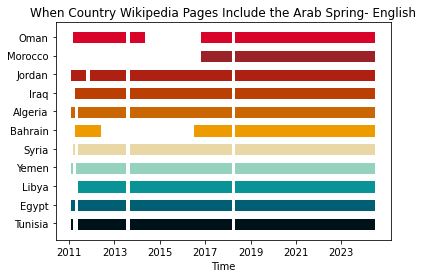

In [34]:
fig, ax = plt.subplots()
colorLyst = ['#001219', '#005f73', '#0a9396', '#94d2bd', '#e9d8a6', '#ee9b00', '#ca6702', '#bb3e03', '#ae2012', '#9b2226', '#d90429' ]

j = 0
ystart = 0.65
width = 0.6
for country in countrylyst:
    xrangeLyst = []
    
    #get the sub df
    df = countryDF_final.loc[countryDF_final['event'] == str(country)].reset_index()
#     print(df)

    for i in range(len(df)):
#         print(df['start'])
#         print(i)
        x = df['start'][i]
        y = df['end'][i]- df['start'][i]
        xrangeLyst.append((x,y))

    ax.broken_barh(xranges = xrangeLyst, yrange=(ystart,width), facecolors = colorLyst[j])
    j = j +1
    ystart = ystart + 1
                   


# ax.set_title('When Country Wikipedia Pages Include the Arab Spring')
# ax.set_xlabel('Time')
# ax.legend(labels=eventsLyst, fontsize=11, loc='center left', bbox_to_anchor=(1, 0.5))


plt.yticks([1,2,3,4,5,6,7,8,9,10,11], labels=countrylyst)
ax.set_title('When Country Wikipedia Pages Include the Arab Spring- English')

xfmt = mdates.DateFormatter('%Y')
ax.set_xlabel('Time')
ax.xaxis.set_major_formatter(xfmt)
ax.set_xticks(['2011', '2013', '2015', '2017', '2019', '2021', '2023'])

plt.savefig("04_Visuals/04a_eventInclusionofAS.pdf")
# 
plt.show()

## 2. English Events

In [22]:
eventsLyst = ['Tunisian Revolution', '2011 Egyptian revolution', 'Libyan civil war (2011)',  'Yemeni Revolution', 'Syrian revolution', '2011 Bahraini uprising', '2010–2012 Algerian protests', '2011 Iraqi protests', '2011–2012 Jordanian protests', '2011–2012 Moroccan protests', '2011 Omani protests' ]

In [33]:
#get all of the timestamps in which the arab spring includes the evnets in events

eventTimes = {}
firstTimes_event = {}

for place in eventsLyst:
    print(place)
            
    #get all of the revids that contain 'Arab Spring' in their outlinks
    revidlyst = []
    for revid, outlinks in revid_outlinks.items():
        for link in outlinks:
            if link == place:
                revidlyst.append(revid)

    print(revidlyst)
                
    # make the list unique
    revidlyst_unique = set(revidlyst)
    
    inclusionTimes = []
    for i in revidlyst_unique:
        rev_time = time_revids[time_revids == i].index[0]
        inclusionTimes.append(rev_time)
        
    inclusionTimes.sort()   
    # print(inclusionTimes)

    if len(inclusionTimes) > 0:
        firstTimes_event[place] = inclusionTimes[0]
        eventTimes[place] = inclusionTimes

    else:
        pass
        # firstTimes_event[place] = inclusionTimes[0]
        # eventTimes[place] = inclusionTimes
    

Tunisian Revolution
[]
2011 Egyptian revolution
[410393753, 411278546, 416471292, 416471292, 421746845, 421746845, 426865693, 426865693, 431928008, 437240756, 437240756, 442458467, 447779336, 453390516, 458389010, 463454801, 468859852, 474355956, 479623648, 484927509, 490051378, 495452037, 500152311, 505217506, 510323737, 515401672, 521398852, 525844898, 530796473, 536303160, 541874982, 541874982, 548370708, 548370708, 553131214, 553131214, 557758267, 557758267, 566658623, 566658623, 571056910, 571056910, 575237699, 575237699, 579895106, 579895106, 584343077, 584343077, 588979494, 588979494, 593486940, 593486940, 598023158, 598023158, 602235611, 602235611, 606563583, 606563583, 611063416, 611063416, 615105901, 615105901, 619415663, 619415663, 624622786, 624622786, 627779738, 627779738, 632060302, 632060302, 636433295, 636433295, 640666175, 640666175, 645269429, 645269429, 649999253, 649999253, 654613983, 654613983, 660251514, 660251514, 665355075, 665355075, 670171204, 670171204, 67451

In [32]:
eventTimes['Tunisian Revolution'][0:5]

KeyError: 'Tunisian Revolution'

In [66]:
#break up start and end times

eventDF_final = pd.DataFrame(columns = ['event', 'start', 'end'])

for place in eventTimes.keys():
    startTimes = []
    endTimes = []

    start = firstTimes_event[place]
    startTimes.append(start)
    
    first = eventTimes[place][0]
    final = eventTimes[place][-1:]

    currTime = start
    #get start and end dates
    #go through all the dates in Tunisia
    for date in eventTimes[place]:

        month_from_start = pd.Timestamp(start) + pd.offsets.MonthEnd(n=1)

        #if it reaches the end add it to the endTimes
        if date in final:
            endTimes.append(date)

        if date == first:
            pass

        #if a month is skipped, end the last one with the start(or previous date)
        #start a new section with the new one
        elif date == month_from_start:
    #         print('----pass')
            pass

        #if it is one month after the 'start' - then pass
        else: 
            endTimes.append(start)
            startTimes.append(date)

    #     #if it is not then go back and put end
        start = date
        
    #make dataframe
    eventDict = pd.DataFrame(columns = ['event', 'start', 'end'])
    
    
    eventDict['start'] = startTimes
    eventDict['end'] = endTimes
    eventDict['event'] = place
#     print(countryDict)
    
    eventDF_final = pd.concat([eventDF_final,eventDict])
    

In [67]:
eventDF_final.head()

,event,start,end
0,Tunisian Revolution,2011-01-31 00:00:00+00:00,2013-06-30 00:00:00+00:00
1,Tunisian Revolution,2013-08-31 00:00:00+00:00,2018-02-28 00:00:00+00:00
2,Tunisian Revolution,2018-04-30 00:00:00+00:00,2023-10-31 00:00:00+00:00
0,2011 Egyptian revolution,2011-01-31 00:00:00+00:00,2013-06-30 00:00:00+00:00
1,2011 Egyptian revolution,2013-08-31 00:00:00+00:00,2018-02-28 00:00:00+00:00


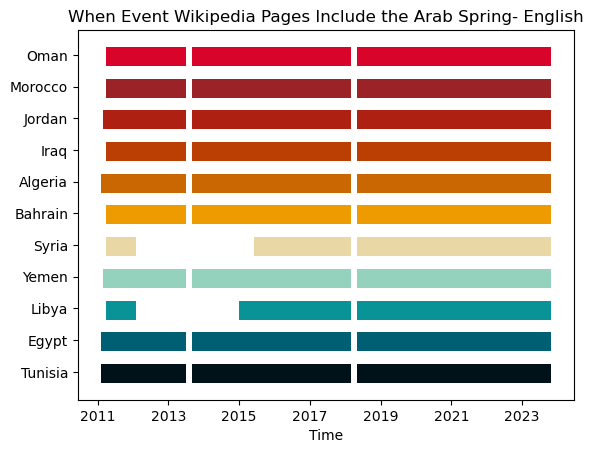

In [69]:
fig, ax = plt.subplots()
colorLyst = ['#001219', '#005f73', '#0a9396', '#94d2bd', '#e9d8a6', '#ee9b00', '#ca6702', '#bb3e03', '#ae2012', '#9b2226', '#d90429' ]

j = 0
ystart = 0.65
width = 0.6
for country in eventsLyst:
    xrangeLyst = []
    
    #get the sub df
    df = eventDF_final.loc[eventDF_final['event'] == str(country)].reset_index()
#     print(df)

    for i in range(len(df)):
#         print(df['start'])
#         print(i)
        x = df['start'][i]
        y = df['end'][i]- df['start'][i]
        xrangeLyst.append((x,y))

    ax.broken_barh(xranges = xrangeLyst, yrange=(ystart,width), facecolors = colorLyst[j])
    j = j +1
    ystart = ystart + 1
                   


ax.set_title('When Event Wikipedia Pages Include the Arab Spring')
ax.set_xlabel('Time')
# ax.legend(labels=eventsLyst, fontsize=11, loc='center left', bbox_to_anchor=(1, 0.5))


ax.set_yticks([1,2,3,4,5,6,7,8,9,10,11], labels=countrylyst)
ax.set_title('When Event Wikipedia Pages Include the Arab Spring- English')

xfmt = mdates.DateFormatter('%Y')
ax.set_xlabel('Time')
ax.xaxis.set_major_formatter(xfmt)
ax.set_xticks(['2011', '2013', '2015', '2017', '2019', '2021', '2023'])

# plt.savefig("02L_eventInclusionofAS.pdf")
# 
plt.show()

# Arabic AS countries and events

## get arabic AS data

In [71]:
#gets the outlink specific time:revid
with open('02c_ar_as_rev_time_m.pkl', 'rb') as pickleFile:
    ar_time_revids = pickle.load(pickleFile)

#gets the outlink specific revid:outlinks 
with open('02c_ar_as_rev_outlinks_m.pkl', 'rb') as pickleFile:
     ar_revid_outlinks = pickle.load(pickleFile)

In [72]:
ar_time_revids

timestamp
2011-02-28 00:00:00+00:00     6345923.0
2011-03-31 00:00:00+00:00     6459075.0
2011-04-30 00:00:00+00:00     6602258.0
2011-05-31 00:00:00+00:00     6758727.0
2011-06-30 00:00:00+00:00     6911767.0
                                ...    
2023-06-30 00:00:00+00:00    62699194.0
2023-07-31 00:00:00+00:00    63391950.0
2023-08-31 00:00:00+00:00    63619143.0
2023-09-30 00:00:00+00:00    64206689.0
2023-10-31 00:00:00+00:00    64997097.0
Name: revid, Length: 144, dtype: float64

## arabic countries

In [70]:
countrylyst_total = ['تونس', 'مصر', 'اليمن', 'سوريا', 'البحرين', 'الجزائر',   'الأردن', 'المغرب', 'ليبيا', 'العراق', 'سلطنة عُمان' ]

In [77]:
#get all of the timestamps in which the arab spring includes the evnets in countrylyst

countryTimes = {}
firstTimes = {}

for place in countrylyst:
            
    #get all of the revids that contain 'Arab Spring' in their outlinks
    revidlyst = []
    for revid, outlinks in ar_revid_outlinks.items():
        for link in outlinks:
            if link == place:
                revidlyst.append(revid)
                
    # make the list unique
    revidlyst_unique = set(revidlyst)
    
    inclusionTimes = []
    for i in revidlyst_unique:
        rev_time = ar_time_revids[ar_time_revids == i].index[0]
        inclusionTimes.append(rev_time)
        
    inclusionTimes.sort()   

    if len(inclusionTimes) > 0:
        ar_firstTimes[place] = inclusionTimes[0]
        ar_countryTimes[place] = inclusionTimes
    else:
        #these are countries that are not included at all in the page
        pass

### Break up the start and end times

In [74]:
eventDF_final = pd.DataFrame(columns = ['event', 'start', 'end'])

for place in countryTimes.keys():
    startTimes = []
    endTimes = []

    start = firstTimes[place]
    startTimes.append(start)
    
    first = countryTimes[place][0]
    final = countryTimes[place][-1:]

    currTime = start
    #get start and end dates
    #go through all the dates in Tunisia
    for date in countryTimes[place]:

        month_from_start = pd.Timestamp(start) + pd.offsets.MonthEnd(n=1)

        #if it reaches the end add it to the endTimes
        if date in final:
            endTimes.append(date)

        if date == first:
            pass

        #if a month is skipped, end the last one with the start(or previous date)
        #start a new section with the new one
        elif date == month_from_start:
    #         print('----pass')
            pass

        #if it is one month after the 'start' - then pass
        else: 
            endTimes.append(start)
            startTimes.append(date)

    #     #if it is not then go back and put end
        start = date
        
    #make dataframe
    countryDict = pd.DataFrame(columns = ['event', 'start', 'end'])
    
    
    countryDict['start'] = startTimes
    countryDict['end'] = endTimes
    countryDict['event'] = place
#     print(countryDict)
    
    countryDF_final = pd.concat([countryDF_final,countryDict])
    